## German Tech Stock Analyse with Visualization and Prediction
I want here to look at data from the stock market, particularly some german technology stocks. Let's handle this with  pandas to get stock information, visualize different aspects of it, and finally i want to look at a few ways of analyzing the risk of a stock, based on its previous performance history. I am also going to predict future stock prices through a Long Short Term Memory (LSTM) method!

In [8]:
import pandas_datareader
from pandas_datareader import data
import pandas as pd
import numpy as np

import matplotlib.pyplot as plot
import seaborn as sns
sns.set_style('whitegrid')
plot.style.use("fivethirtyeight")
from datetime import datetime

In [15]:
# The german tech stocks we'll use for this analysis
tech_list = ['SAP', 'SIEGY', 'ZLNDY']

#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:
    # Set DataFrame as the Stock Ticker
    globals()[stock] = data.DataReader(stock, data_source = 'yahoo', 
                                       start = '2019-01-01', 
                                       end = datetime.now())

In [16]:
stock_data_list = [SAP, SIEGY, ZLNDY]
company_name_list = ["SAP", "SIEMENS", "ZALANDO"]

for company, com_name in zip(stock_data_list, company_name_list):
    company["company_name"] = com_name
    
df = pd.concat(stock_data_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-01-11,58.070000,57.049999,57.869999,57.730000,4326.0,57.730000,ZALANDO
2021-01-12,58.790001,58.279999,58.599998,58.705002,4911.0,58.705002,ZALANDO
2021-01-13,59.119999,58.689999,58.840000,59.119999,3580.0,59.119999,ZALANDO
2021-01-14,59.320000,59.070000,59.320000,59.070000,2956.0,59.070000,ZALANDO
2021-01-15,57.220001,56.139999,57.209999,56.139999,12554.0,56.139999,ZALANDO
2021-01-19,56.950001,56.700001,56.779999,56.950001,5464.0,56.950001,ZALANDO
2021-01-20,58.070000,57.665001,57.910000,57.810001,2854.0,57.810001,ZALANDO
2021-01-21,59.900002,58.974998,58.974998,59.720001,3209.0,59.720001,ZALANDO
2021-01-22,60.000000,59.250000,59.250000,59.990002,7316.0,59.990002,ZALANDO


Let's go ahead and play around with the SAP DataFrame to get a feel for the data

In [17]:
# Take a look at the last five rows at the tail of the dataframe

# Summary Stats
SAP.describe()

,High,Low,Open,Close,Volume,Adj Close
count,520.000000,520.000000,520.000000,520.000000,5.200000e+02,520.000000
mean,129.008788,127.066615,128.069135,128.078115,8.519121e+05,126.650328
std,16.499489,16.392938,16.507167,16.448026,7.778580e+05,17.094641
min,96.169998,90.900002,92.500000,94.129997,1.179000e+05,92.790428
25%,117.695000,115.819998,117.100000,116.705000,4.660750e+05,115.216705
50%,127.514999,125.639999,126.684998,126.509998,6.643000e+05,125.047039
75%,136.895000,135.182499,135.827499,136.024998,9.863250e+05,134.526905
max,169.300003,166.289993,168.089996,169.020004,1.129020e+07,169.020004


In [18]:
SAP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 520 entries, 2019-01-02 to 2021-01-25
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          520 non-null    float64
 1   Low           520 non-null    float64
 2   Open          520 non-null    float64
 3   Close         520 non-null    float64
 4   Volume        520 non-null    float64
 5   Adj Close     520 non-null    float64
 6   company_name  520 non-null    object 
dtypes: float64(6), object(1)
memory usage: 32.5+ KB


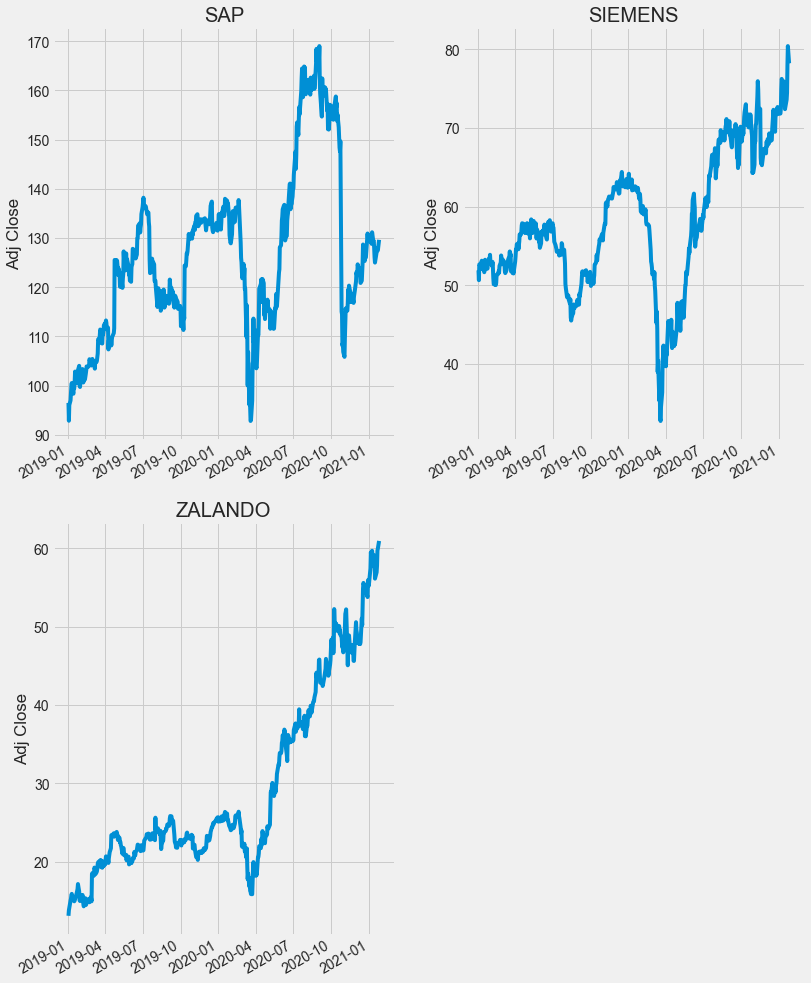

In [25]:
# Let's see a historical view of the closing price
plot.figure(figsize=(12, 12))
plot.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(stock_data_list, 1):
    plot.subplot(2, 2, i)
    company['Adj Close'].plot()
    plot.ylabel('Adj Close')
    plot.xlabel(None)
    plot.title(f"{company_name_list[i - 1]}")

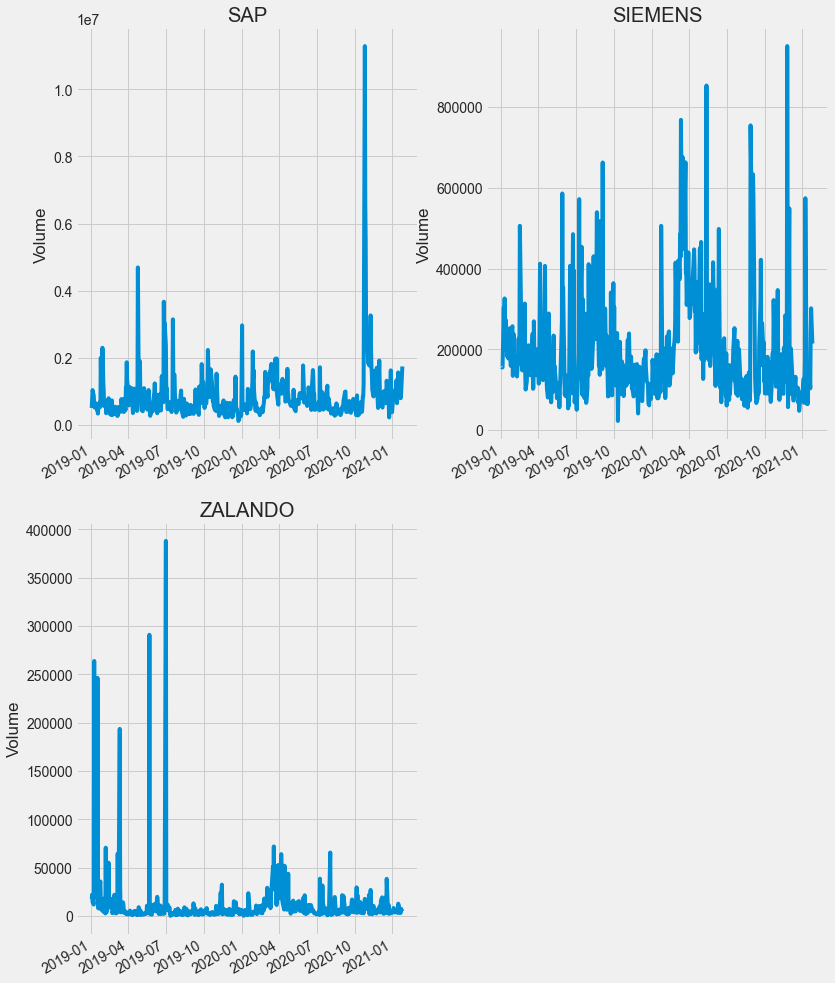

In [26]:
# Now let's plot the total volume of stock being traded each day
plot.figure(figsize=(12, 12))
plot.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(stock_data_list, 1):
    plot.subplot(2, 2, i)
    company['Volume'].plot()
    plot.ylabel('Volume')
    plot.xlabel(None)
    plot.title(f"{company_name_list[i - 1]}")

That is the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

In [27]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in stock_data_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [28]:
print(SIEGY.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


Now plot all the additional Moving Averages

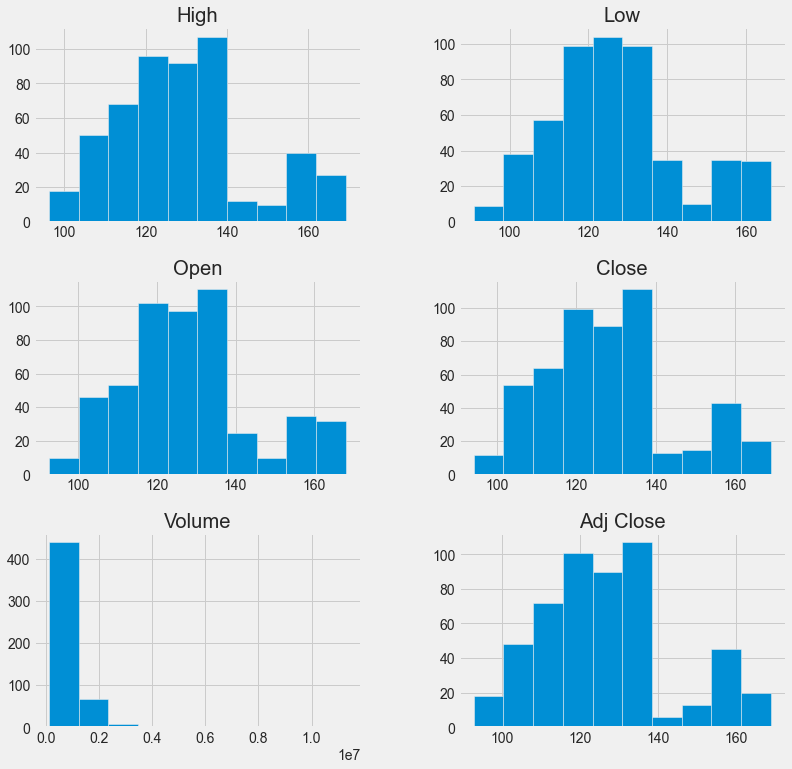

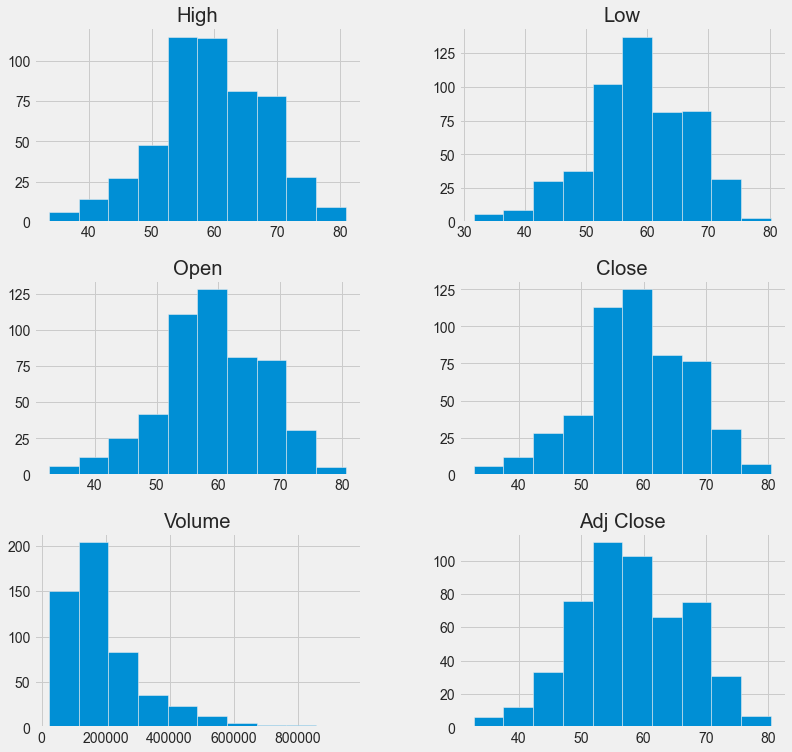

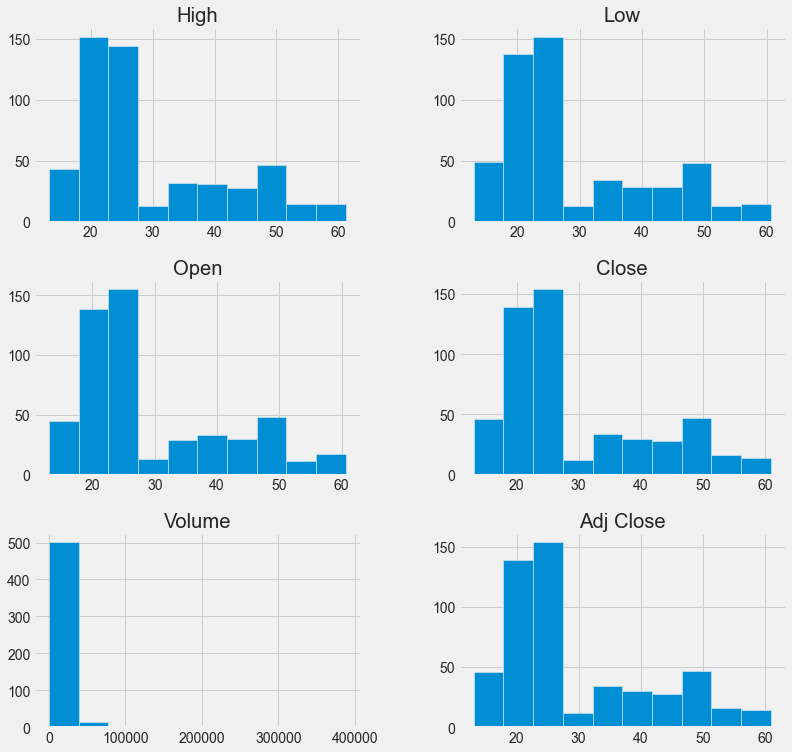

In [29]:
df.groupby("company_name").hist(figsize=(12, 12));

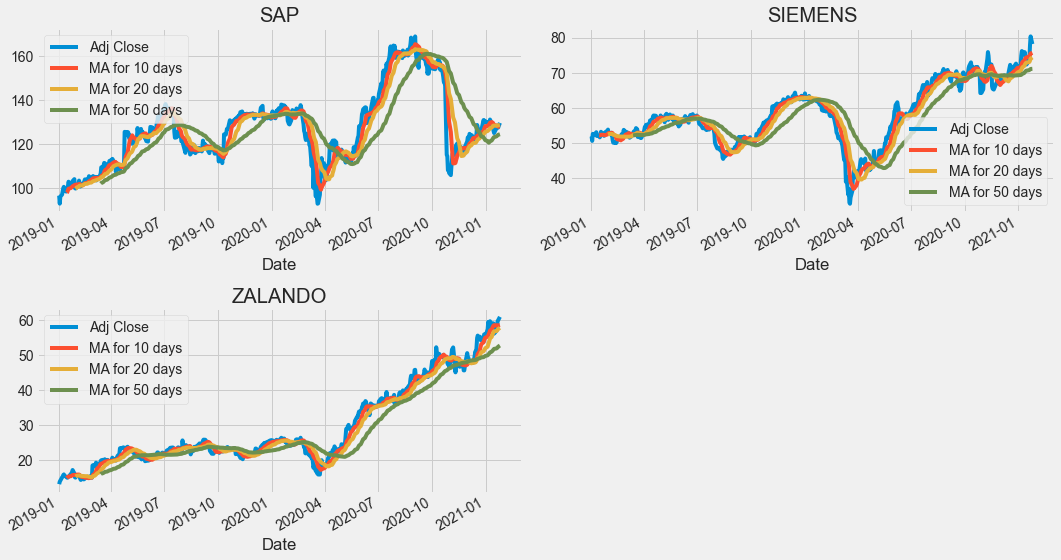

In [32]:
fig, axes = plot.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

SAP[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('SAP')

SIEGY[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('SIEMENS')

ZLNDY[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('ZALANDO')

axes[1,1].set_visible(False)

fig.tight_layout()

There are some baseline analysis, let's go ahead and dive a little deeper. Now I need to go analyze the risk of the stock. In order to do so i need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's use pandas to retrieve the daily returns for the SAP stock.

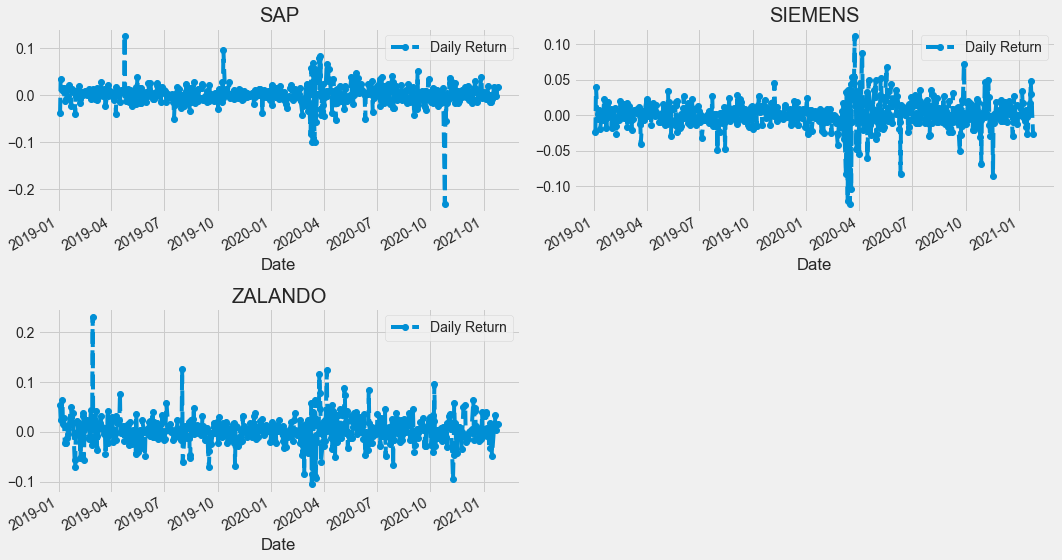

In [33]:
# We'll use pct_change to find the percent change for each day
for company in stock_data_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plot.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

SAP['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('SAP')

SIEGY['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('SIEMENS')

ZLNDY['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('ZALANDO')

axes[1,1].set_visible(False)

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. I want to use seaborn to create both a histogram and kde plot on the same figure.

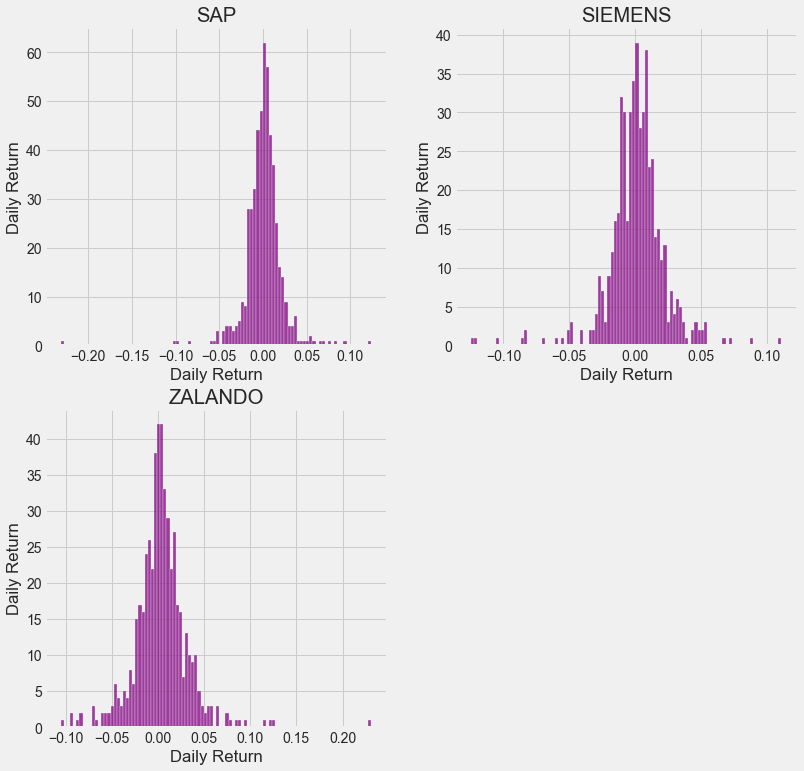

In [34]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plot.figure(figsize=(12, 12))

for i, company in enumerate(stock_data_list, 1):
    plot.subplot(2, 2, i)
    sns.histplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plot.ylabel('Daily Return')
    plot.title(f'{company_name_list[i - 1]}')

Now what if i wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ["Close"] columns for each of the stocks dataframes.

In [35]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = data.DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,SAP,SIEGY,ZLNDY
Date,,,
2020-01-27,134.311020,61.009941,24.590000
2020-01-28,130.574951,61.376602,24.469999
2020-01-29,129.776474,61.608173,24.430000
2020-01-30,129.106155,60.894157,24.195000
2020-01-31,128.909012,59.379280,24.010000


In [36]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,SAP,SIEGY,ZLNDY
Date,,,
2020-01-27,NaN,NaN,NaN
2020-01-28,-0.027817,0.006010,-0.004880
2020-01-29,-0.006115,0.003773,-0.001635
2020-01-30,-0.005165,-0.011590,-0.009619
2020-01-31,-0.001527,-0.024877,-0.007646


Now compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

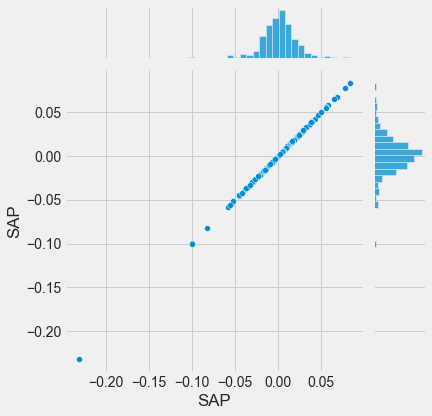

In [37]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x = 'SAP', y = 'SAP', data = tech_rets)

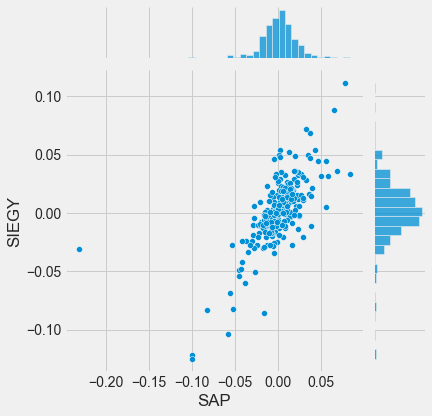

In [39]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x = 'SAP', y = 'SIEGY', data = tech_rets)

So now let's see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list.

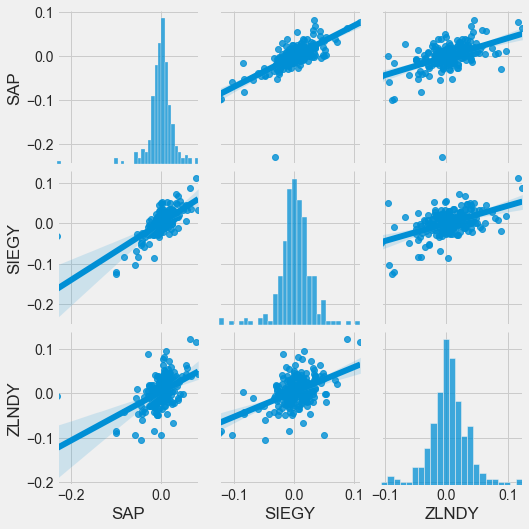

In [40]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above showed all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between SAP and Siemens daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic you can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

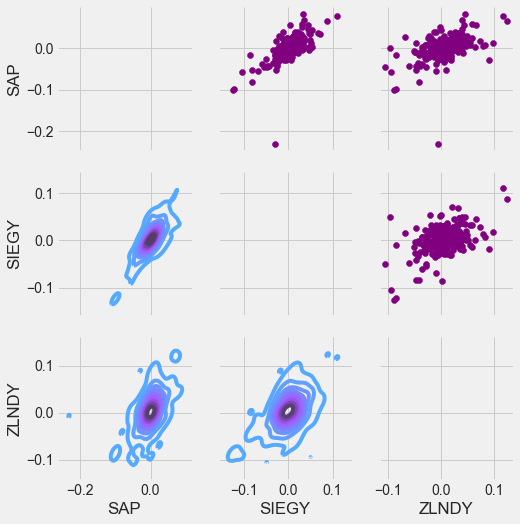

In [41]:
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plot.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plot.hist, bins=30)

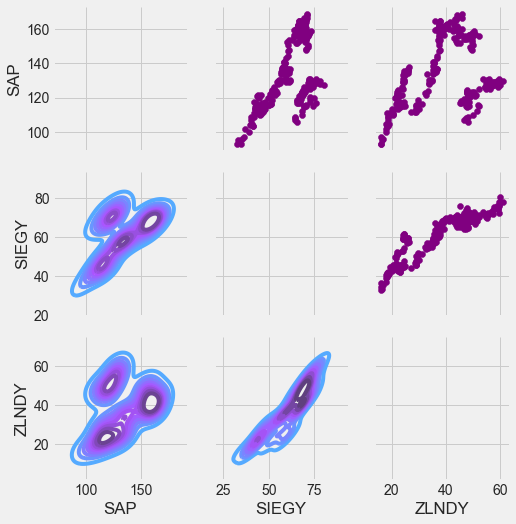

In [42]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plot.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plot.hist,bins=30)

Finally, i can also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Siemens and SAP.

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

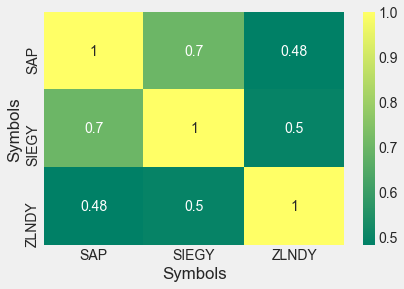

In [43]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

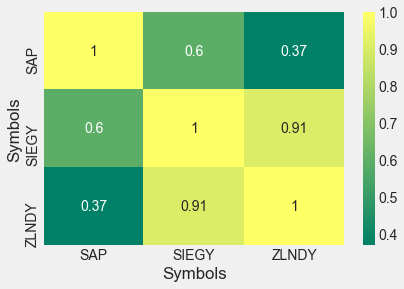

In [44]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

### Risk of investing
There are many ways you can quantify risk, one of the most basic ways using the information on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

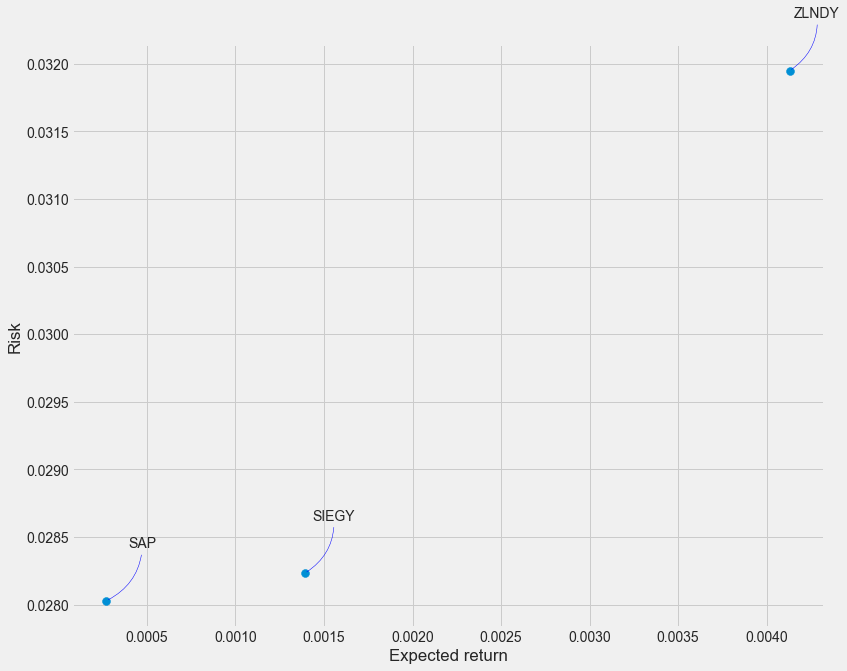

In [45]:
# Let's start by defining a new DataFrame as a clenaed version of the orignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plot.figure(figsize=(12, 10))
plot.scatter(rets.mean(), rets.std(), s=area)
plot.xlabel('Expected return')
plot.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plot.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

### Predicting the closing price stock price of SAP:

In [46]:
#Get the stock quote
df = data.DataReader('SAP', data_source='yahoo', start = '2015-01-01', end = datetime.now())
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,70.360001,69.639999,69.790001,70.040001,683600.0,64.109856
2015-01-05,68.360001,67.059998,68.300003,67.199997,1678800.0,61.510311
2015-01-06,66.459999,65.360001,65.930000,65.680000,1478900.0,60.119011
2015-01-07,65.459999,64.599998,64.980003,65.089996,1483100.0,59.578960
2015-01-08,66.309998,64.500000,64.510002,66.129997,1184700.0,60.530910
...,...,...,...,...,...,...
2021-01-19,127.250000,125.239998,126.459999,127.080002,892400.0,127.080002
2021-01-20,128.029999,126.629997,126.739998,127.629997,917100.0,127.629997
2021-01-21,128.130005,126.820000,127.599998,127.900002,797500.0,127.900002


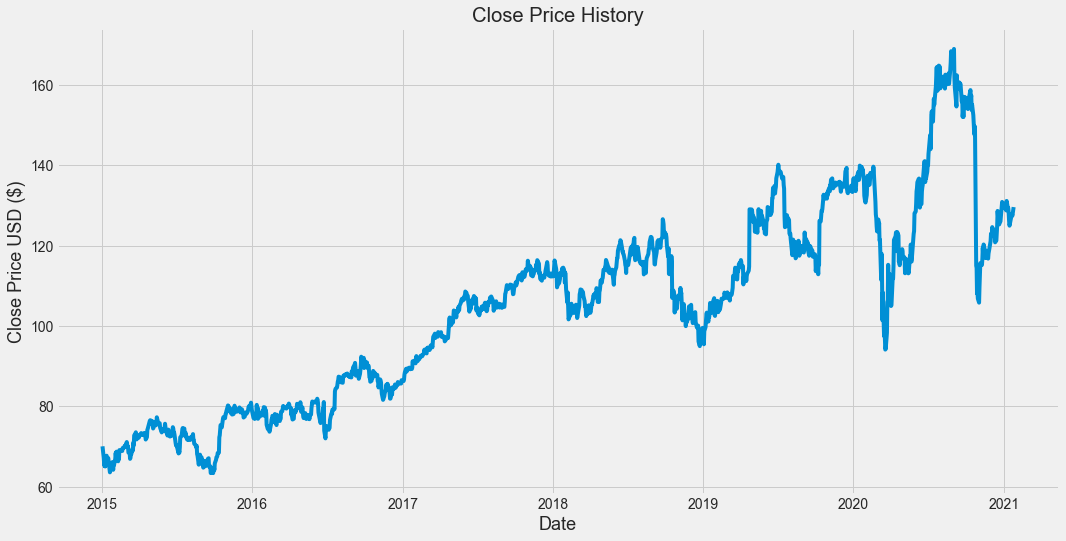

In [47]:
plot.figure(figsize=(16,8))
plot.title('Close Price History')
plot.plot(df['Close'])
plot.xlabel('Date', fontsize=18)
plot.ylabel('Close Price USD ($)', fontsize=18)
plot.show()

In [48]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

1221

In [49]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.063133  ],
       [0.03625175],
       [0.02186466],
       ...,
       [0.61079034],
       [0.60681497],
       [0.62716519]])

In [50]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.063133  , 0.03625175, 0.02186466, 0.01628014, 0.02612398,
       0.01571226, 0.04098436, 0.03331756, 0.0340748 , 0.03322289,
       0.03539992, 0.00179841, 0.00672033, 0.00927591, 0.01088498,
       0.02584003, 0.02016092, 0.00776151, 0.02318978, 0.01883579,
       0.03388545, 0.04742071, 0.03805017, 0.05054425, 0.0312352 ,
       0.02782772, 0.03748228, 0.03284427, 0.054141  , 0.054141  ,
       0.0540464 , 0.05291055, 0.05215332, 0.05925223, 0.05972552,
       0.06152393, 0.06445813, 0.06133459, 0.0645528 , 0.07326078,
       0.06663516, 0.06161853, 0.06256511, 0.04836729, 0.04836729,
       0.03350691, 0.03615715, 0.04467579, 0.04458119, 0.0578325 ,
       0.05338384, 0.07193565, 0.06568858, 0.0888784 , 0.09304304,
       0.09616658, 0.08272599, 0.07931851, 0.08679604, 0.08849978])]
[0.0832938835042425]

[array([0.063133  , 0.03625175, 0.02186466, 0.01628014, 0.02612398,
       0.01571226, 0.04098436, 0.03331756, 0.0340748 , 0.03322289,
       0.03539992, 0.00179841, 0.006

In [51]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Using TensorFlow backend.


Epoch 1/1
1161/1161 [==============================] - 224s 193ms/step - loss: 0.0014


In [52]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4.803403877336373

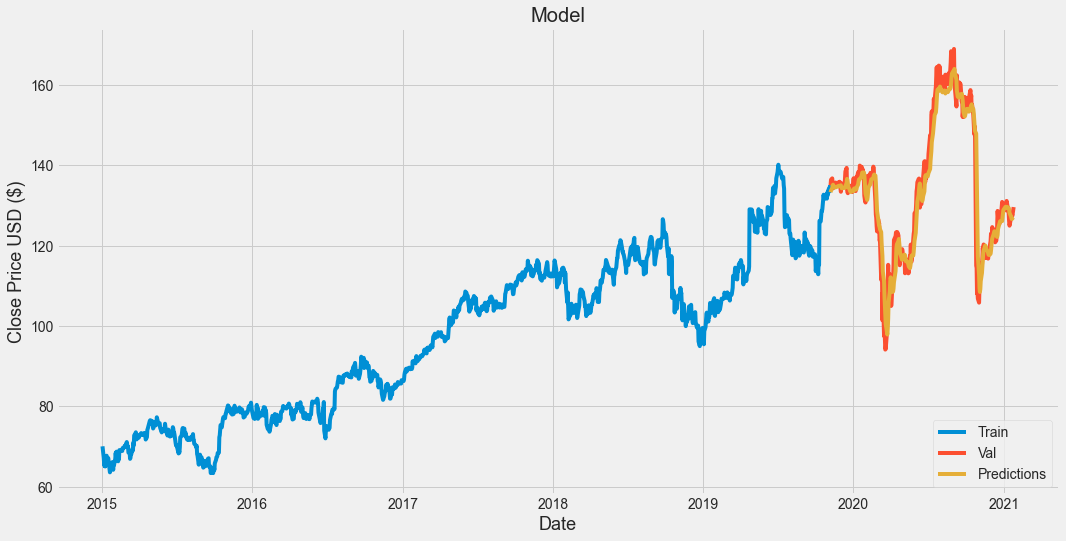

In [56]:
# Plot the data
train = data[:training_data_len].copy()
valid = data[training_data_len:].copy()
valid['Predictions'] = predictions
# Visualize the data
plot.figure(figsize=(16,8))
plot.title('Model')
plot.xlabel('Date', fontsize=18)
plot.ylabel('Close Price USD ($)', fontsize=18)
plot.plot(train['Close'])
plot.plot(valid[['Close', 'Predictions']])
plot.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plot.show()

In [54]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-11-07,135.080002,133.313156
2019-11-08,136.440002,133.747726
2019-11-11,136.779999,134.369324
2019-11-12,135.369995,135.000290
2019-11-13,134.300003,135.205750
...,...,...
2021-01-19,127.080002,127.165077
2021-01-20,127.629997,126.697578
2021-01-21,127.900002,126.666588
